# Analyzing COVID-19 in the United States and Its Impact

Throughout the final unit we have explored COVID-19 and its spread throughout the world. 

The visualizations in this notebook will focus on and explore its impact on the United States.

In [4]:
#Import all libraries you may need in this cell:
import pandas as pd 
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.dates import DateFormatter

## 1 - Finding the COVID-19 numbers per state.

In [5]:
#3 lists of data compiled for your convenience

#List of states sorted in alphabetical order.
statesList = ["Alabama","Alaska","Arizona","Arkansas","California","Colorado",
  "Connecticut","Delaware","Florida","Georgia","Hawaii","Idaho","Illinois",
  "Indiana","Iowa","Kansas","Kentucky","Louisiana","Maine","Maryland",
  "Massachusetts","Michigan","Minnesota","Mississippi","Missouri","Montana",
  "Nebraska","Nevada","New Hampshire","New Jersey","New Mexico","New York",
  "North Carolina","North Dakota","Ohio","Oklahoma","Oregon","Pennsylvania",
  "Rhode Island","South Carolina","South Dakota","Tennessee","Texas","Utah",
  "Vermont","Virginia","Washington","West Virginia","Wisconsin","Wyoming"]

#Corresponding latitudes for each state.
latitudes = [32.361538, 58.301935, 33.448457, 34.736009, 38.555605, 39.7391667, 41.767, 39.161921, 30.4518, 33.76,
            21.30895, 43.613739, 39.783250, 39.790942, 41.590939, 39.04, 38.197274, 30.45809, 44.323535, 38.972945,
            42.2352, 42.7335, 44.95,32.320, 38.572954,46.595805,40.809868,39.160949,43.220093, 40.221741,35.667231,
            42.659829,35.771, 48.813343,39.962245, 35.482309,44.931109, 40.269789, 41.82355, 34.000,  44.367966,36.165,
            30.266667,40.7547,44.26639, 37.54, 47.042418,38.349497,43.074722, 41.145548]

#Corresponding longitudes for each state.
longitudes = [-86.279118,-134.419740,-112.073844, -92.331122,-121.468926 ,-104.984167 ,-72.677 , -75.526755 ,
              -84.27277,-84.39,-157.826182 ,-116.237651 ,-89.650373 ,-86.147685 ,-93.620866 ,-95.69 , -84.86311
              ,-91.140229 ,-69.765261 ,-76.501157 ,-71.0275 ,-84.5467 , -93.094 ,-90.207 , -92.189283
              , -112.027031 ,-96.675345 ,-119.753877 ,-71.549127 , -74.756138, -105.964575 , -73.781339 ,-78.638 
              ,-100.779004 ,-83.000647 , -97.534994,-123.029159 ,-76.875613 , -71.422132, -81.035, -100.336378
              ,-86.784 ,-97.75 ,-111.892622 ,-72.57194 ,-77.46 ,-122.893077 ,-81.633294 ,-89.384444 ,-104.802042]


Use the New York Times' COVID-19 data(https://github.com/nytimes/covid-19-data/blob/master/us-states.csv) to create **two functions** that takes the name of a state as input and returns the bar plots of 1) # of cases over time and 2) # of deaths over time for that specific state.

In [23]:
df = pd.read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv")
df.head()


,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0


In [45]:
def covid19Cases(timeseriesData, state):
    timeseriesData = timeseriesData.loc[:,['date', 'state', 'cases']]
    
    timeseriesData = timeseriesData.loc[timeseriesData['state'] == state]
    
    fig = plt.figure()
    ax = fig.add_axes([0,0,2,2])
    dates = timeseriesData['date']
    numCases = timeseriesData['cases']
    plt.plot(dates,numCases)
    ax.bar(dates, numCases)
    plt.title("Cases of COVID-19 " + state)
    plt.xlabel("Dates")
    plt.ylabel("Cases")

    plt.show
    

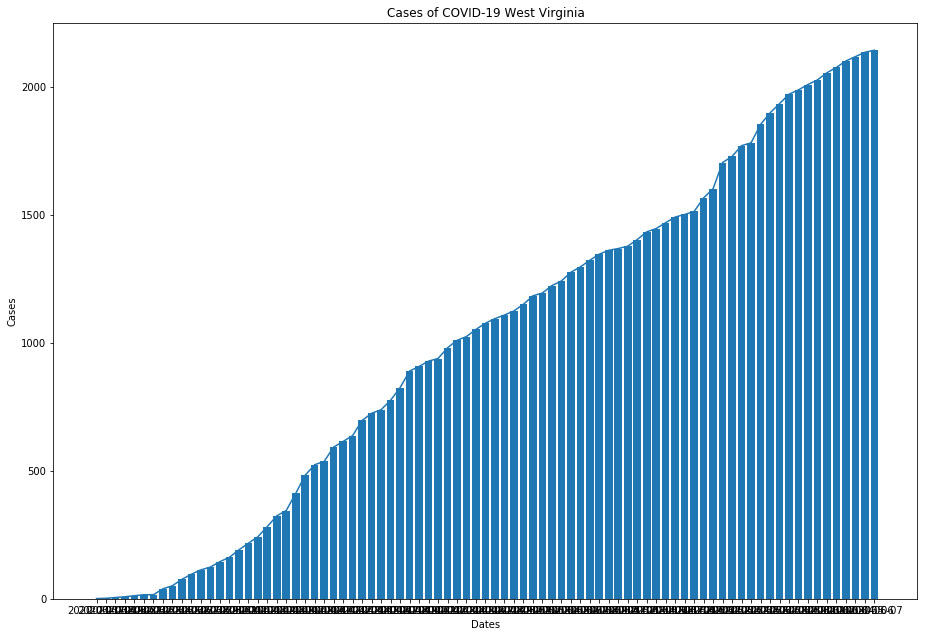

In [48]:
covid19Cases(df, "West Virginia")

In [49]:
def covid19Deaths(timeseriesData, state):
    timeseriesData = timeseriesData.loc[:,['date', 'state', 'deaths']]
    
    timeseriesData = timeseriesData.loc[timeseriesData['state'] == state]
    
    fig = plt.figure()
    ax = fig.add_axes([0,0,2,2])
    dates = timeseriesData['date']
    numCases = timeseriesData['deaths']
    plt.plot(dates,numCases)
    ax.bar(dates, numCases)
    plt.title("Deaths of COVID-19 " + state)
    plt.xlabel("Dates")
    plt.ylabel("Deaths")

    plt.show

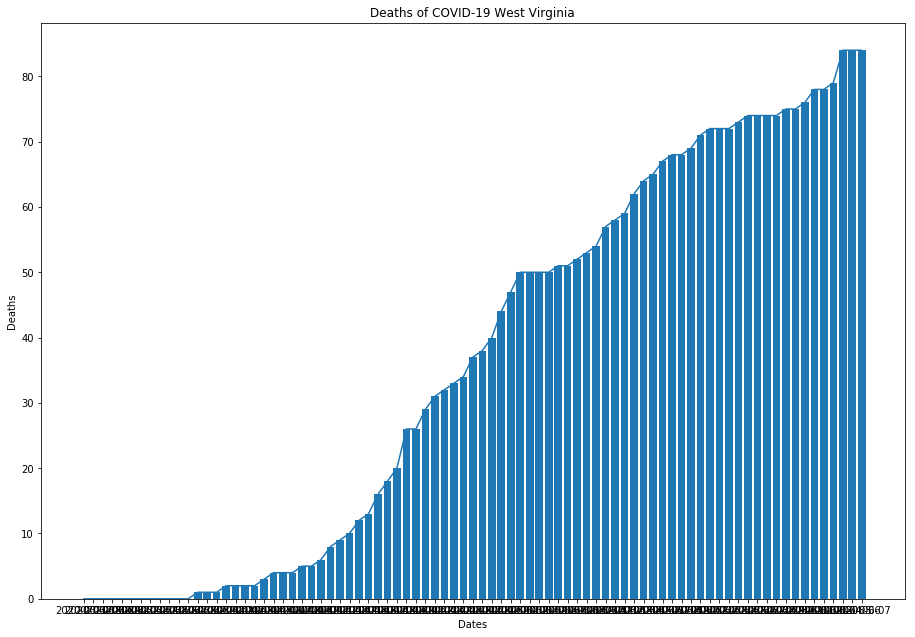

In [50]:
covid19Deaths(df, "West Virginia")

Call the functions on your assigned state to visualize the data.

Use New York Times' COVID-19 data(https://github.com/nytimes/covid-19-data/blob/master/us-states.csv) to create a geographical scatterplot and choropleth map of the United States based on its numbers of COVID-19 cases and deaths. (Use colors that you think are appropriate).

In [22]:
df = pd.read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv")
df.head()

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0


In [42]:
def dfFormatter(df, selectColumn): 
    df_formatted = pd.DataFrame(statesList, columns = ['state'])
    df_formatted['lat'] = latitudes 
    df_formatted['long'] = longitudes

    previousDate = "2020-01-01"
    for i in range(len(df['date'])):
        if df['date'][i] != previousDate:
            df_formatted[df['date'][i]] = 0

    df_formatted.set_index('state', inplace = True)

    if selectColumn == 'cases':
        for i in range(len(df['state'])):
            df_formatted.loc[df['state'][i], df['date'][i]] = df['cases'][i]

    df_formatted.reset_index(inplace = True)

    df_formatted.drop([50,51,52,53,54], inplace = True)

    return df_formatted

df_cases = dfFormatter(df, 'cases')
df_cases

,state,lat,long,2020-01-21,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,...,2020-05-29,2020-05-30,2020-05-31,2020-06-01,2020-06-02,2020-06-03,2020-06-04,2020-06-05,2020-06-06,2020-06-07
0,Alabama,32.361538,-86.279118,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,17031.0,17359.0,17952.0,18534.0,18771.0,18851.0,19072.0,19387.0,20043.0,20500.0
1,Alaska,58.301935,-134.419740,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,436.0,441.0,469.0,476.0,497.0,516.0,542.0,565.0,579.0,588.0
2,Arizona,33.448457,-112.073844,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,18465.0,19255.0,19936.0,20123.0,21250.0,22245.0,22818.0,24369.0,25517.0,26924.0
3,Arkansas,34.736009,-92.331122,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6777.0,7013.0,7253.0,7443.0,7818.0,8067.0,8425.0,8651.0,9101.0,9426.0
4,California,38.555605,-121.468926,0.0,0.0,0.0,0.0,1.0,2.0,2.0,...,107043.0,110100.0,113114.0,115643.0,118081.0,120407.0,122917.0,126510.0,129147.0,131997.0
5,Colorado,39.739167,-104.984167,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,25602.0,26084.0,26364.0,26563.0,26774.0,27046.0,27346.0,27601.0,27834.0,27987.0
6,Connecticut,41.767000,-72.677000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,41762.0,42022.0,42201.0,42740.0,42979.0,43091.0,43239.0,43460.0,43818.0,43968.0
7,Delaware,39.161921,-75.526755,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,9236.0,9422.0,9498.0,9605.0,9685.0,9712.0,9746.0,9773.0,9845.0,9942.0
8,Florida,30.451800,-84.272770,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,54489.0,55416.0,56155.0,56822.0,57439.0,58756.0,60175.0,61480.0,62750.0,63930.0
9,Georgia,33.760000,-84.390000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,43888.0,44336.0,45051.0,45757.0,46063.0,46711.0,47528.0,48280.0,48943.0,49371.0


In [74]:
#cases = df.loc[df["date"] == "2020-06-07"]
states_cases = cases.drop([5302,5305,5330,5335,5343],axis =0)

fig = go.Figure(data = go.Scattergeo(
    lon = df_cases['long'],
    lat = df_cases['lat'],
    text = states_cases["cases"],
    mode = "markers",
    marker = dict(
        size = 10,
        opacity = 0.8,
        reversescale = True,
        autocolorscale = True,
        symbol = 'circle',
        line = dict(
            width = 1,
            color = 'rgba(102, 102, 102)'
        ),
        cmin = 0,
        color = states_cases["cases"],
        cmax = states_cases["cases"].max(),
        colorbar_title = "COVID-19 Cases",
    )
))
fig.update_layout(
    title = "COVID-19 Cases",
    geo = dict(
        scope = "usa",
        showland = True,
    )
)
fig.show()
fig.write_html('first_figure.html', auto_open=True)


In [59]:
codes = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2011_us_ag_exports.csv')

,code,state,category,total exports,beef,pork,poultry,dairy,fruits fresh,fruits proc,total fruits,veggies fresh,veggies proc,total veggies,corn,wheat,cotton
0,AL,Alabama,state,1390.63,34.4,10.6,481.0,4.06,8.0,17.1,25.11,5.5,8.9,14.33,34.9,70.0,317.61
1,AK,Alaska,state,13.31,0.2,0.1,0.0,0.19,0.0,0.0,0.00,0.6,1.0,1.56,0.0,0.0,0.00
2,AZ,Arizona,state,1463.17,71.3,17.9,0.0,105.48,19.3,41.0,60.27,147.5,239.4,386.91,7.3,48.7,423.95
3,AR,Arkansas,state,3586.02,53.2,29.4,562.9,3.53,2.2,4.7,6.88,4.4,7.1,11.45,69.5,114.5,665.44
4,CA,California,state,16472.88,228.7,11.1,225.4,929.95,2791.8,5944.6,8736.40,803.2,1303.5,2106.79,34.6,249.3,1064.95


In [82]:
fig = go.Figure(data=go.Choropleth(
    locations = codes["code"], # Spatial coordinates
    z = states_cases["cases"], # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Reds',
    colorbar_title = "COVID-19 Cases",
))
fig.update_layout(
    title_text = 'COVID-19 Cases',
    geo_scope='usa', # limit map scope to USA
)
fig.show()
fig.write_html('first_figure.html', auto_open=True)

## 2 - Analyzing Its Impact on the United States

Group 4 -

COVID-19 has a greater impact on some people more than others depending on specific factors. 

Using the following dataset from cdc.gov(https://data.cdc.gov/widgets/9bhg-hcku), create a function that plots bar graphs that analyze the # of deaths based on age demographics and gender demographics in each state.

In [71]:
cdc_df = pd.read_csv("Provisional_COVID-19_Death_Counts_by_Sex__Age__and_State.csv")
cdc_df.head()

,Data as of,Start week,End Week,State,Sex,Age group,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths,"Pneumonia, Influenza, or COVID-19 Deaths",Footnote
0,06/03/2020,02/01/2020,05/30/2020,United States,All Sexes,Under 1 year,5.0,5377.0,46.0,1.0,13.0,63.0,NaN
1,06/03/2020,02/01/2020,05/30/2020,United States,All Sexes,1-4 years,3.0,1048.0,39.0,2.0,39.0,79.0,NaN
2,06/03/2020,02/01/2020,05/30/2020,United States,All Sexes,5-14 years,12.0,1523.0,49.0,2.0,45.0,104.0,NaN
3,06/03/2020,02/01/2020,05/30/2020,United States,All Sexes,15-24 years,106.0,9442.0,200.0,34.0,50.0,318.0,NaN
4,06/03/2020,02/01/2020,05/30/2020,United States,All Sexes,25-34 years,583.0,20133.0,709.0,254.0,143.0,1168.0,NaN


In [80]:
def covid19Age(timeseriesData, Age):
    timeseriesData = timeseriesData.loc[:,['date', 'Age group', 'COVID-19 Deaths']]
    
    timeseriesData = timeseriesData.loc[timeseriesData['Age group'] == Age]
    
    fig = plt.figure()
    ax = fig.add_axes([0,0,2,2])
    dates = timeseriesData['date']
    numCases = timeseriesData['COVID-19 Deaths']
    plt.plot(dates,numCases)
    ax.bar(dates, numCases)
    plt.title("Death from COVID-19 " + Age)
    plt.xlabel("Dates")
    plt.ylabel("Age Groups")

    plt.show

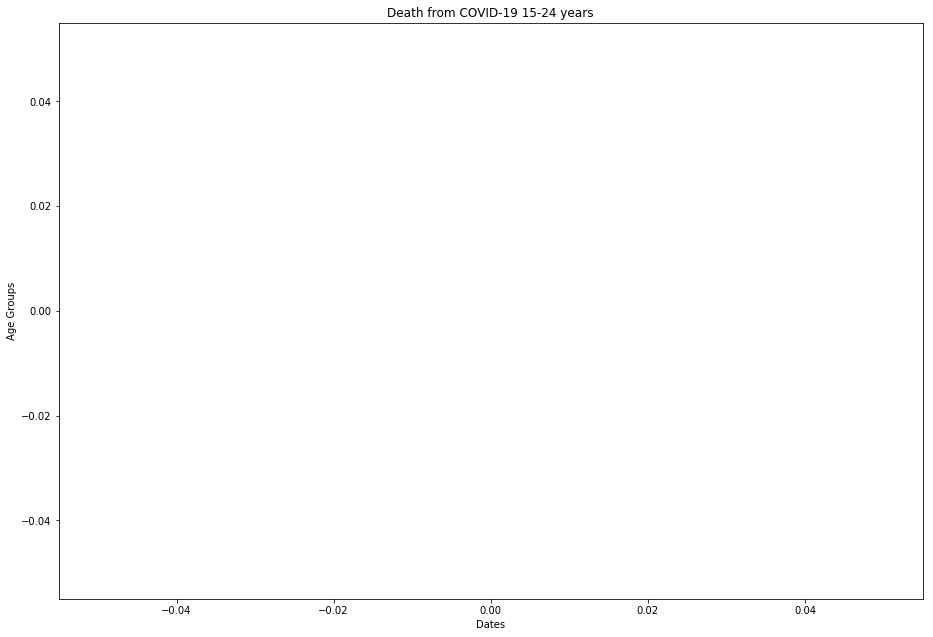

In [81]:
covid19Age(df, "15-24 years")

## 3 - Challenge (optional): Find a dataset online that explores other ways that COVID-19 has impacted the United States and use pandas and Plotly to create a visualization based on it.

Some ideas:
* number of business closures in each state over time
* number of people telecommuting in the US
* number of hospitalizations in each state

etc..